Importing the latest data from https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
confirmed_cases = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_cases = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovery_cases = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [2]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


In [3]:
deaths_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,4,4,6,6,7,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,8,10,10,11,15,15,16,17,20,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,26,29,31,35,44,58,86,105,130,152
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,3,3,6,8,12,14,15,16,17,18
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,2,2,2,2,2,2,2,2


In [4]:
recovery_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,2,2,5,5,10,10,10,15
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,33,44,52,67,76,89,99,104
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,29,31,31,37,46,61,61,62,90,90
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,10,10,10,10,16,21,26
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,2,2


Cleaning data

In [5]:
confirmed_cases_ke = confirmed_cases.groupby('Country/Region').sum().loc['Kenya'][3:]
confirmed_cases_ke.tail()

4/1/20     81.0
4/2/20    110.0
4/3/20    122.0
4/4/20    126.0
4/5/20    142.0
Name: Kenya, dtype: float64

In [6]:
death_cases_ke = deaths_cases.groupby('Country/Region').sum().loc['Kenya'][3:]
death_cases_ke.tail()

4/1/20    1.0
4/2/20    3.0
4/3/20    4.0
4/4/20    4.0
4/5/20    4.0
Name: Kenya, dtype: float64

In [7]:
recovery_cases_ke = recovery_cases.groupby('Country/Region').sum().loc['Kenya'][3:]
recovery_cases_ke.tail()

4/1/20    3.0
4/2/20    4.0
4/3/20    4.0
4/4/20    4.0
4/5/20    4.0
Name: Kenya, dtype: float64

Plotting the data

Text(0.5, 0, 'Time period (days)')

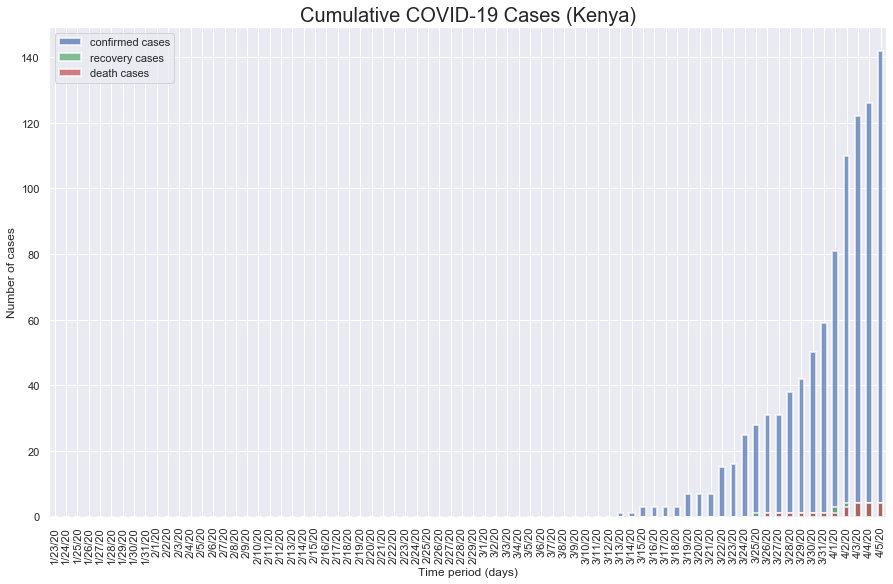

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

plt.figure(figsize=(15,9))

confirmed_cases_ke.plot.bar(linewidth=2, label='confirmed cases', color='b', alpha=0.7)
recovery_cases_ke.plot.bar(linewidth=2, label='recovery cases', color='g', alpha=0.7)
death_cases_ke.plot.bar(linewidth=2, label='death cases', color='r', alpha=0.7)

plt.legend()
plt.title("Cumulative COVID-19 Cases (Kenya)",fontsize=20)
plt.ylabel('Number of cases')
plt.xlabel('Time period (days)')

Text(0.5, 0, 'Time period (days)')

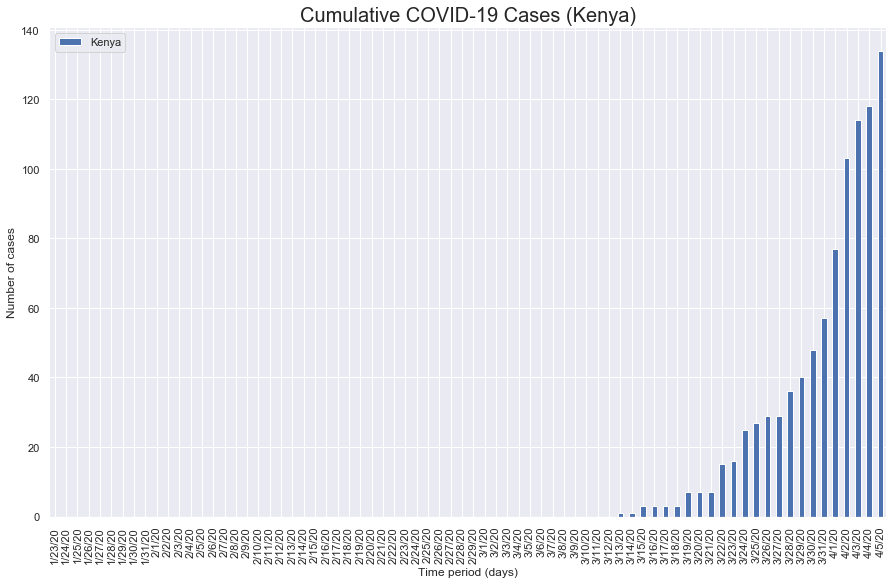

In [10]:
active_cases_ke = confirmed_cases_ke - recovery_cases_ke - death_cases_ke
plt.figure(figsize=(15,9))
active_cases_ke.plot.bar()
plt.legend()
plt.title("Active COVID-19 Cases (Kenya)",fontsize=20)
plt.ylabel('Number of cases')
plt.xlabel('Time period (days)')